## Connect Intensive - Machine Learning Nanodegree

## Week 4. Supervised Learning  - Linear Regression  

## Objectives    

- Learn basics of linear regression
- Numpy
- Feature scaling
- Identifying multi-colinearity

Let us start by importing the libraries

In [1]:
try:
    import numpy as np
    print("Successfully imported numpy! Version {}".format(np.version.version))
except ImportError:
    print("Could not import numpy!")
    
try:
    import pandas as pd
    print("Successfully imported pandas! Version {}".format(pd.__version__))
except ImportError:
    print("Could not import pandas!")
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
    print("Successfully imported matplotlib! Version {}".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib!")

try:
    import seaborn as sns
    print("Successfully imported seaborn! Version {}".format(sns.__version__))
except ImportError:
    print("Could not import seaborn!")
    

from IPython.display import display
%matplotlib inline

Successfully imported numpy! Version 1.12.0b1
Successfully imported pandas! Version 0.18.0
Successfully imported matplotlib! Version 1.5.1
Successfully imported seaborn! Version 0.7.1


The first exercise should be familiar by now. We will import a regressor and a metric, then train some data to a linear model.
$$ y = w_0 + w_1\cdot x $$
The data will be generated so we'll know what the answer should be. The second part will be calculating the slope ($w_1$) and intercept ($w_0$) using the exact formula. The notebook will guide you through it. 
The third part will be trying out _gradient-descent_ manually so you get a sense of what goes on in the algorithms.

In [64]:
def quick_plot(X, Y, model):
    plt.figure(2)
    plt.scatter(X, Y, c="blue", alpha=0.3, s=50.0 )
    plt.plot(X, model, c="gray")
    plt.ylim(Y.min(), Y.max())
    plt.show()
    
np.random.seed(seed=40)
X = np.linspace(0, 10, 100)
def f_line(m, b, X):
    return X*m + b

This is from our notebook from session 2 -- I am generating some noisy data based on a straight line

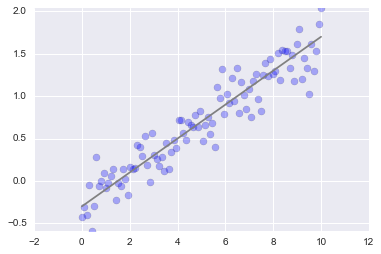

In [65]:
# Generate a line with slope m and intercept b (keep them between -1.0 and 1.0)
Y=f_line(m=0.2, b=-0.3, X=X);
# Assign a value to sigma (between 0.1 and 5.0)
sigma = 0.2

# r is a vector of random numbers drawn from a normal distribution centered on 0, with a standard deviation of sigma.
# quick_plot overlays the "observed" noisy data (Y+random values) and the underlying true value (Y).
r =  np.random.normal(0, sigma, len(X))
quick_plot(X, Y + r, Y)

#### Linear Regression using `sklearn`

** TO DO:**

Use the `LinearRegression` class from the `sklearn.linear_model` package to calculate the slope and intercept of the "best-fit line" through our generated data.

In [66]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression(fit_intercept=True, normalize=False) # TODO

#TO DO - Fit the regresor to our data
lreg.fit(X.reshape(-1, 1), (Y+r).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<p style="background-color:#ff8">**Note:** X and Y are both defined as `numpy` arrays, which means they are set up as row vectors (1, 100). When numpy reports the shape of an array, it reports it as (100,) indicating it is not set up as a matrix. While `numpy` math can handle `numpy` arrays and "do the right thing", `sklearn` model classes (i.e., Classifiers nd Regressors) cannot. So we needed to reshape both X and Y to be matrices, in this column vectors with shape (100,1). The X.reshape(-1,1) is a convenient way to turn a row vector to a column vector without having to know the actual length of the row vector. Alternatively, we could have used X.reshape(100, 1).</p>

In [67]:
#The results of the fit are available through the `coef_` attribuccte after the model has been fit
print("Slope is {:.3f}, and intercept is {:.3f}".format(lreg.coef_.ravel()[0], lreg.intercept_[0]))

Slope is 0.193, and intercept is -0.268


In [130]:
# Calculate mean squared error 
# Y - np.array(N, 1) - ground truth
# Y_pred - np.array(N, 1) - predictions
def mse(Y, Y_pred):
    return np.sum((Y-Y_pred)**2)/Y.shape[0]

print("MSE of original line with noisy data: {:.4f}".format(mse(Y+r, Y)))
print("MSE of best-fit line with noisy data: {:.4f}".format(mse(Y+r, f_line(m=lreg.coef_.ravel()[0], b=lreg.intercept_[0], X=X))))

MSE of original line with noisy data: 0.0379
MSE of best-fit line with noisy data: 0.0374


<p style="background-color:#ff8">**Note:** We know that the slope should be 0.2 and the intercept should be -0.3, yet the LinearRegressor returned a different best-fit line. Why is that? <br /><br />

I moved the **mse** function up so we can compare the mean-squared error (MSE) values for the actual line (Y) with the best fit line to check whether LinearRegression worked properly. The cell above (not in the notebook we worked on in class) shows that indeed the line returned by LinearRegressor gives a lower MSE value than the original line we used to generate Y+r!! This teaches us that the results of algorithms need to be interpreted in the context of the "real-world" from which the data was drawn. Although we generated this data ourselves, it represents data that one might collect in the real world where there is noise. In this case, we appear to have overfitted the data by training the data over the full data set!! 
</p>

The exact formula for the slope and intercept of a linear regression to this data is:
$$ \large w_1 =  {\Sigma (X-\bar{X})\cdot(Y - \bar{Y}) \over \Sigma (X - \bar{X})^2  }  $$

$$ \large w_0 =  \bar{Y}  - w_1 \cdot \bar{X} $$

Each of the sums are over all data points, i.e. $\Sigma_{i=1}^N$. $\bar{X}$ and $\bar{Y}$ are the average values of $X$ and $Y$.

**TO DO:**

In [69]:
# The goal here is to calculate the slope and intercept using these formulas and numpy functions you are familiar with
# Hints: 1. Calcuate the mean of X and Y
#        2. Calculate X - X.mean
#        3. Calculate the slope (w1). The division is over scalar values so you need to sum over all data points before dividing 
X_shift = X - X.mean() 
O = Y + r
slope = np.dot(X_shift, O-O.mean())/(X_shift**2).sum()  # TODO - implement this

# Calulate the intercept.
intercept = O.mean() - slope*X.mean() # TO DO  - implement this

print("Slope is {:.3f}, and intercept is {:.3f}".format(slope, intercept))

Slope is 0.193, and intercept is -0.268


<p style="background-color:#ff8">**Note:** These answers match the results from LineaRegressor.</p>

For the third part, we are going to do a walk-through of gradient descent in one dimension. The method works because the error function is *convex*, i.e., looks bowl-shaped and calculus tells us that the quickest way to get to the bottom is following the path of steepest descent. `Steepest descent` is basically another term for `direction in which the change in error is largest`. In the algorithms we will use, the "slope" (or gradient in multi-dimensions) isn't calculated exactly this way, but the principle is similar.

For this part to work without errors, the arguments should have the correct shape. X and Y should be numpy array of shape (100, 2) and (100, 1) respectively. W should be a numpy array of shape (1, 2). 

In [70]:
# Calculate mean squared error 
# Y - np.array(N, 1) - ground truth
# Y_pred - np.array(N, 1) - predictions
def mse(Y, Y_pred):
    return np.sum((Y-Y_pred)**2)/Y.shape[0]

# A very simple gradient function 
#     Calculate the gradient by comparing the difference in MSE for small 
#      changes in the two components of W
def get_gradient(X, Y, W):
    MSE = mse(Y, np.dot(X, W))
    step = 1.0e-7
    W_test = W.copy()
    W_test = W_test + np.array([step, 0]).reshape(2, 1)
    delta0 = (MSE - mse(Y, np.dot(X, W_test)))/step
    W_test = W_test + np.array([-step, step]).reshape(2, 1)
    delta1 = (MSE - mse(Y, np.dot(X, W_test)))/step
    return np.array([delta0, delta1])

def update_weights(W, gradient, lrate=0.001):
    return W + (gradient * lrate).reshape(2, 1)

Lets set up the numpy arrays we will need for this exercise. 
We will start with a guess for the slope and intercept as weights. Notice that the way I have defined X_train, weights[0][0] will be the intercept and weights[1][0] will be the slope.

In [327]:
X_train = np.ones(200).reshape(100,2)
X_train[:,1] = X
X_train = X_train.reshape(100, 2)

weights = np.array([1.0, 0.5]).reshape(2, 1)
Y_train=(Y+r).reshape(100,1)
Y_train.shape

(100, 1)

**TO DO:** The next step is to choose a `learning rate` (lrate). Choosing this is very important in getting good results. For this part of the exercise, try three different values of lrate and run the cell below repeatedly to see if you can get the slope and intercept close to the values you expect. Write down what you observe for each lrate value you tried below, along with approximately how many iterations it took to reach a value close enough to satisfy you.

If you run into trouble like the values not getting better, reset the problem by running the cell above again.

_HINT:_ Small `lrate` will take a long time to converge and large `lrate` will not converge at all.

In [393]:
lrate = 0.001
for i in range(10):
    grad = get_gradient(X_train, Y_train, weights)
    weights = update_weights(weights, grad, lrate)
    #weights = weights + (grad*lrate).reshape(2,1)
print "MSE = {:.5f}, Slope = {:.3f} and intercept = {:.3f}"\
        .format(mse(np.dot(X_train, weights), Y_train), weights[1][0], weights[0][0])

MSE = 0.03739, Slope = 0.193 and intercept = -0.268


**Answer:**
<p style="background-color:#ff8">**Note:** This exercise was meant to give you a basic feel for how learning rate affects convergence in gradient descent. For fun, here is a 3D picture of our error surface -- you can see the steep drops along the  long shallow valley that made this a bit challenging.<br /><br />
I started with a small lrate (0.001) and number of iterations(10), then as the MSE got smaller, I incrceased the number of iterations and the lrate to get the result shown (which matches the exact answer above).<br /><br />

For fun, I have plotted the error surface for this problem so you can visualize the shallow valley whose minimum was our goal.
</p>

In [394]:
from mpl_toolkits import mplot3d

In [395]:
def f(x, y):
    max_i, max_j = x.shape
    z=np.zeros(max_i*max_j)
    for i in range(max_i):
        for j in range(max_j):
            z[i*max_j + j] = mse(X*x[i][j] + y[i][j], Y+r)
    return z.reshape(max_i, max_j)
        
t_slope = np.linspace(0.15, 0.25, 30)
t_int = np.linspace(-0.2, -0.4, 30)

mesh_X, mesh_Y = np.meshgrid(t_slope, t_int)
Z = f(mesh_X, mesh_Y)

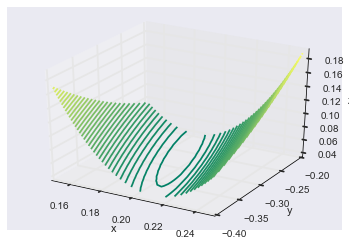

In [396]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(mesh_X, mesh_Y, Z, 50, cmap="summer")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');